A short introduction to fast SPT modeling
-----------------------------------------

This notebook presents a short introduction to the modeling of fast single particle tracking datasets. 
The methodology, together with examples of biological relevance, can be found at:

> Hansen, Anders S., Iryna Pustova, Claudia Cattoglio, Robert Tjian, and Xavier Darzacq. “CTCF and Cohesin Regulate Chromatin Loop Stability with Distinct Dynamics.” bioRxiv, 2016, 093476.

This package includes several sample datasets, that will be used by this notebook. Make sure that they can be found by Python.

## 1. Loading of a dataset

To help us with basic and repeated tasks such as dataset loading, we created a small library, `fastSPT_tools` that contain several helper functions that we will use all across this tutorial. We thus need to import it by typing `import fastSPT_tools`.

One of the functions list the available datasets: `list_sample_datasets(path)`. Let's first see what datasets we can get. Then, we will use the `load_dataset(path, dataset_id, cells)` function to load the relevant dataset. This latter function can either load one single cell or a series of cells (identified by their id).

In [2]:
import sys
from tqdm.autonotebook import tqdm
sys.version

sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

C:\Users\andre\Programs\Miniconda\envs\spoton\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat

import fastspt as fs
from fastspt import fit, tools, plot, readers, matimport, tracklen
%load_ext autoreload

%autoreload 2

print("Using fastspt version {}".format(fs.__version__))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using fastspt version 16.1


In [4]:
import os
os.getcwd()

'Z:\\Andrey\\data\\2019\\0403-RAMM-e-coli-pbp2-PAmCherry-TLK130\\100x_1.49NA\\0403_OD0.1\\FOV5\\movie_continuos_exp_60ms_561_50W_405_12.5mW_1'

In [5]:
xml_path = r"movie_continuos_exp_60ms_561_50W_405_12_Tracks_filter_min_intensity.xml"
path_wt = r"Z:\Andrey\fromGizem\2019-04-18-PBP2-tracks\WTforAndrey.mat"
path_oe = r"Z:\Andrey\fromGizem\2019-04-18-PBP2-tracks\PBP2OverExpforAndrey.mat"

In [ ]:
all_exp = matimport.read_gizem_mat(path_oe)
#cell4 = matimport.concat_all(all_exp, exposure_ms=60., pixel_size_um=0.075)
reps = matimport.concat_reps(all_exp, exposure_ms=60., pixel_size_um=0.075)

In [310]:
cell4_spt = readers.to_fastSPT(cell4, from_json=False)

In [311]:
cell3   = readers.read_trackmate_xml(xml_path)

In [312]:
cell3_spt = readers.to_fastSPT(cell3, from_json=False)

In [19]:
cell = reps[0]
cell_spt = readers.to_fastSPT(cell, from_json=False)

# Track lengths analysis

4256 tracks, 30575 localizations
15 15
(15,) (15,)


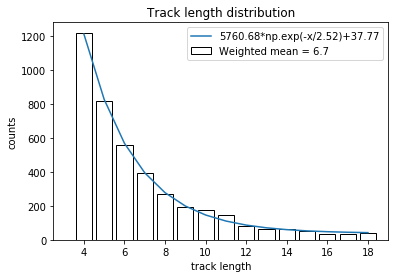

True

In [21]:
tracklen.get_track_lengths_dist(cell)

## 2. Computation of the jump lengths distribution

In [22]:
def plot_fit(fit_result):
    import numpy as np
    ## Generate the PDF corresponding to the fitted parameters
    y = fit.generate_jump_length_distribution(fit_result.params, 
                                              JumpProb = JumpProbCDF, 
                                              r=HistVecJumpsCDF,
                                              LocError = fit_result.params['sigma'].value, 
                                              dT = params['dT'], 
                                              dZ = params['dZ'], 
                                              a = params['a'], 
                                              b = params['b'], 
                                              norm=True, 
                                              useZcorr=params['useZcorr'])
    ## Normalization does not work for PDF yet (see commented line in fastspt.py)
    if CDF1:
        y*=float(len(HistVecJumpsCDF))/float(len(HistVecJumps))
    plt.figure(figsize=(18,8)) # Initialize the plot
    plot.plot_histogram(HistVecJumps, JumpProb, HistVecJumpsCDF, y, ) ## Read the documentation of this function to learn how to populate all the 'na' fields
    return True

In [23]:
CDF=False
CDF1 = True
h1 = fit.compute_jump_length_distribution(cell_spt, CDF=CDF1, useEntireTraj=False)
#h1 = fit.compute_jump_length_distribution(jump_intervals_per_track_sim, CDF=CDF1, useEntireTraj=False)

if CDF1:
    HistVecJumps = h1[2]
    JumpProb = h1[3]
    HistVecJumpsCDF = h1[0]
    JumpProbCDF = h1[1]
else:
    HistVecJumps = h1[0]
    JumpProb = h1[1]
    HistVecJumpsCDF = h1[0]
    JumpProbCDF = h1[1]

print("Computation of jump lengths performed in {:.2f}s".format(h1[-1]['time']))

Number of frames: 1000.0, number of localizations: 30575
Computation of jump lengths performed in 1.30s


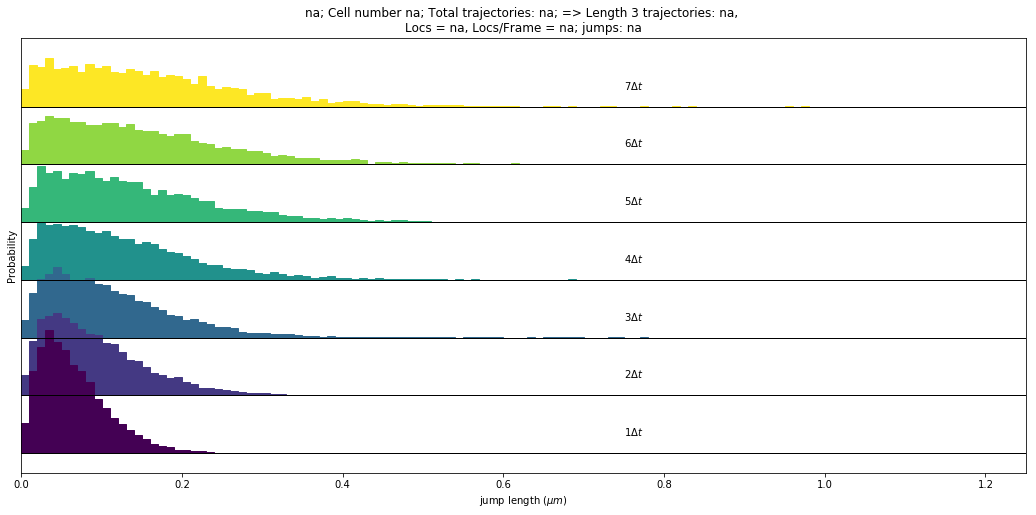

In [24]:
# Initialize the plot
plt.figure(figsize=(18,8))
plot.plot_histogram(HistVecJumps, JumpProb) ## Read the documentation of this function to learn how to populate all the 'na' fields

## 3. Fitting of the jump lengths distribution to the model (2 states)


### By estimating the localization error from the data

Improved fit on iteration 1
Improved error is 4.7674445730577e-06
Name        Value      Min      Max   Stderr
D_bound      0.02        0     0.02     None
D_free      0.001    0.001        1     None
F_bound    0.8216        0        1     None
sigma     0.01856    0.005      0.1     None
None
Improved fit on iteration 2
Improved error is 3.0430436031747177e-06
Name        Value      Min      Max   Stderr
D_bound  0.0009959        0     0.02 6.47e-05
D_free     0.0237    0.001        1  0.00021
F_bound    0.2045        0        1 0.003259
sigma     0.01893    0.005      0.1 0.0003625
None
Improved fit on iteration 3
Improved error is 3.0430436031745585e-06
Name        Value      Min      Max   Stderr
D_bound  0.0009959        0     0.02 6.47e-05
D_free     0.0237    0.001        1  0.00021
F_bound    0.2045        0        1 0.003259
sigma     0.01893    0.005      0.1 0.0003625
None


C:\Users\andre\Documents\Spot-On-cli\fastspt\fit.py:556: RuntimeWarning: invalid value encountered in true_divide
  norm_y[i,:] = y[i,:]/y[i,:].sum()


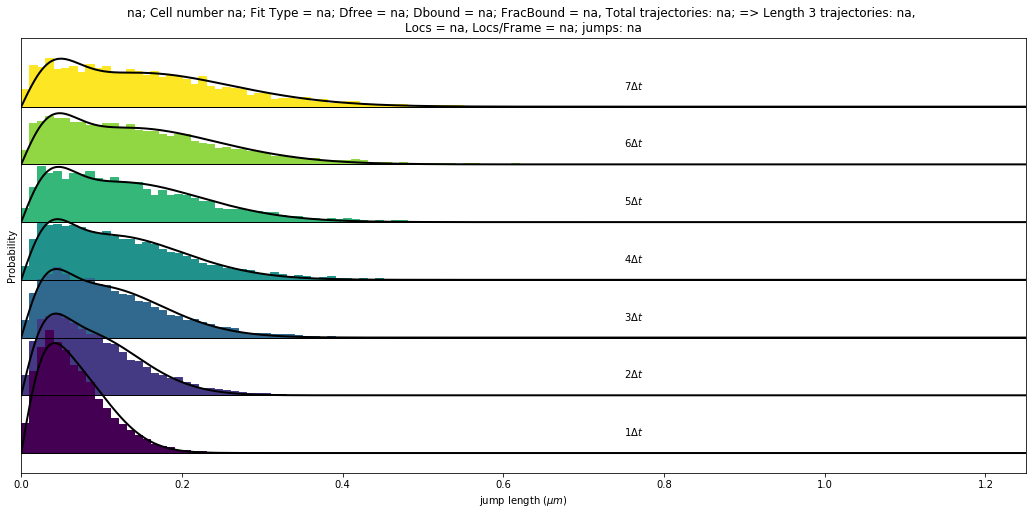

In [25]:
#reload(fastspt)

## Generate a dictionary of parameters
Frac_Bound = [0, 1]
D_Free = [0.001, 1]
D_Bound = [0.0, 0.02]
sigma_bound = [0.005, 0.1]                                   ## This line change
LB = [D_Free[0], D_Bound[0], Frac_Bound[0], sigma_bound[0]]  ## This line too
UB = [D_Free[1], D_Bound[1], Frac_Bound[1], sigma_bound[1]]  ## And this line

params = {'UB': UB,
          'LB': LB,
          'LocError': None, # Manually input the localization error in um: 35 nm = 0.035 um.
          'iterations': 3, # Manually input the desired number of fitting iterations:
          'dT': 65/1000, # Time between frames in seconds
          'dZ': 0.700, # The axial illumination slice: measured to be roughly 700 nm
          'ModelFit': [1,2][CDF],
          'fit2states': True,
          'fitSigma': True,
          'a': 0.15716,
          'b': 0.20811,
          'useZcorr': False
}

## Perform the fit
fit_result = fit.fit_jump_length_distribution(JumpProb, JumpProbCDF, HistVecJumps, HistVecJumpsCDF, **params)
plot_fit(fit_result)
fit_result

In [36]:
#reps_fits = pd.DataFrame(columns=fit_result.best_values.)

In [37]:
#reps_fits.append('rep1', fit_result.best_values)

TypeError: cannot concatenate object of type "<class 'str'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

The result of the fit has been stored in the `fit_result` variable. We can now plot the fitted results overlaid with the empirical distribution.

## 4. Fitting of the jump lengths distribution to the model (3 states)
### By providing the localization error

In [31]:
## Generate a dictionary of parameters
Frac_Bound = [0, 1]
Frac_Fast = [0, 1]
D_Fast = [0.01, 0.5]
D_Med = [0.01, 0.1]
D_Bound = [0.0005, 0.08]
LB = [D_Fast[0], D_Med[0], D_Bound[0], Frac_Fast[0], Frac_Bound[0]]
UB = [D_Fast[1], D_Med[1], D_Bound[1], Frac_Fast[1], Frac_Bound[1]]

params = {'UB': UB,
          'LB': LB,
          'LocError': 0.019, # Manually input the localization error in um: 35 nm = 0.035 um.
          'iterations': 3, # Manually input the desired number of fitting iterations:
          'dT': 62/1000, # Time between frames in seconds
          'dZ': 0.700, # The axial illumination slice: measured to be roughly 700 nm
          'ModelFit': [1,2][CDF],
          'fit2states': False,
          'a': 0.15716,
          'b': 0.20811,
          'useZcorr': False
}

## Perform the fit
fit_result = fs.fit.fit_jump_length_distribution(JumpProb, JumpProbCDF, HistVecJumps, HistVecJumpsCDF, **params)
plot_fit(fit_result)
fit_result

Improved fit on iteration 1
Improved error is 1.8733405752803351e-06
Name        Value      Min      Max   Stderr
D_bound    0.0005   0.0005     0.08     None
D_fast    0.01342     0.01      0.5     None
D_med     0.04033     0.01      0.1     None
F_bound    0.1496        0        1     None
F_fast     0.4319        0        1     None
sigma       0.019     -inf      inf     None
None


KeyboardInterrupt: 

In [350]:
import numpy as np
## Generate the PDF corresponding to the fitted parameters

y = fs.fit.generate_jump_length_distribution(fit_result.params,
                                              JumpProb = JumpProb, r=HistVecJumpsCDF,
                                              LocError = fit_result.params['sigma'].value, 
                                              dT = params['dT'], dZ = params['dZ'], 
                                              a = params['a'], b = params['b'], 
                                              fit2states = params['fit2states'], useZcorr=params['useZcorr'])
## Normalize it
norm_y = np.zeros_like(y)
for i in range(y.shape[0]): # Normalize y as a PDF
    norm_y[i,:] = y[i,:]/y[i,:].sum()
scaled_y = (float(len(HistVecJumpsCDF))/len(HistVecJumps))*norm_y #scale y for plotting next to histograms

In [356]:
type(fit_result)

lmfit.model.ModelResult

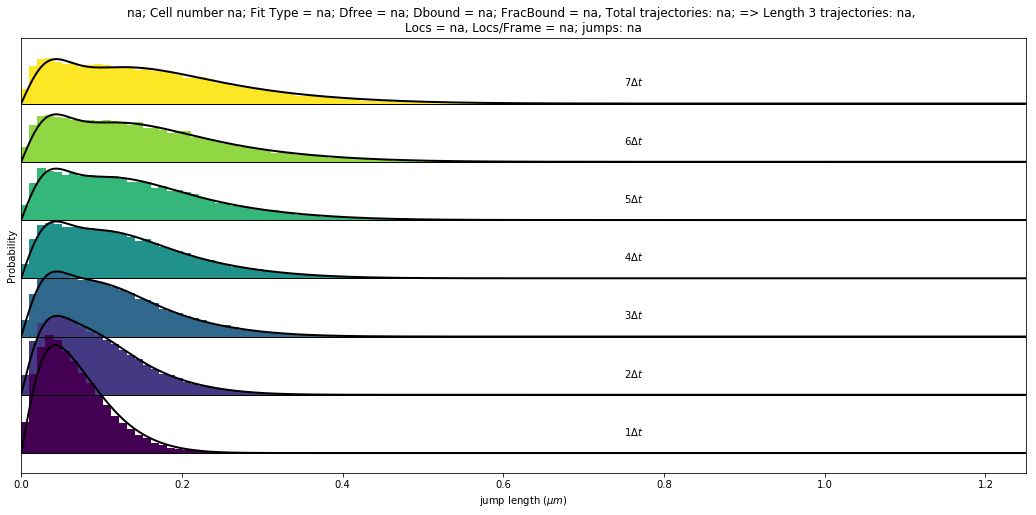

In [351]:
plt.figure(figsize=(18,8)) # Initialize the plot
fs.plot.plot_histogram(HistVecJumps, JumpProb, HistVecJumpsCDF, scaled_y) ## Read the documentation of this function to learn how to populate all the 'na' fields

### By fitting the localization error

In [354]:
## Generate a dictionary of parameters
Frac_Bound = [0, 1]
Frac_Fast = [0, 1]
D_Fast = [0.15, 25]
D_Med = [0.15, 10]
D_Bound = [0.0005, 0.08]
sigma_bound = [0.005, 0.1] 
LB = [D_Fast[0], D_Med[0], D_Bound[0], Frac_Fast[0], Frac_Bound[0], sigma_bound[0]]
UB = [D_Fast[1], D_Med[1], D_Bound[1], Frac_Fast[1], Frac_Bound[1], sigma_bound[1]]

params = {'UB': UB,
          'LB': LB,
          'LocError': None, # Manually input the localization error in um: 35 nm = 0.035 um.
          'iterations': 3, # Manually input the desired number of fitting iterations:
          'dT': 60/1000, # Time between frames in seconds
          'dZ': 0.700, # The axial illumination slice: measured to be roughly 700 nm
          'ModelFit': [1,2][CDF],
          'fit2states': False,
          'fitSigma': True,
          'a': 0.15716,
          'b': 0.20811,
          'useZcorr': True
}

## Perform the fit
fit = fs.fit.fit_jump_length_distribution(JumpProb, JumpProbCDF, HistVecJumps, HistVecJumpsCDF, **params)

Improved fit on iteration 1
Improved error is 2.2708010373862566e-05
Name        Value      Min      Max   Stderr
D_bound   0.02149   0.0005     0.08     None
D_fast      2.148     0.15       25     None
D_med       6.114     0.15       10     None
F_bound    0.7108        0        1     None
F_fast     0.2892        0        1     None
sigma    0.005112    0.005      0.1     None
None


KeyboardInterrupt: 

In [15]:
y = fastspt.generate_jump_length_distribution(fit.params,
                                              JumpProb = JumpProb, r=HistVecJumpsCDF,
                                              LocError = fit.params['sigma'], 
                                              dT = params['dT'], dZ = params['dZ'], 
                                              a = params['a'], b = params['b'], 
                                              fit2states = params['fit2states'], useZcorr=params['useZcorr'])
## Normalize it
norm_y = np.zeros_like(y)
for i in range(y.shape[0]): # Normalize y as a PDF
    norm_y[i,:] = y[i,:]/y[i,:].sum()
scaled_y = (float(len(HistVecJumpsCDF))/len(HistVecJumps))*norm_y #scale y for plotting next to histograms

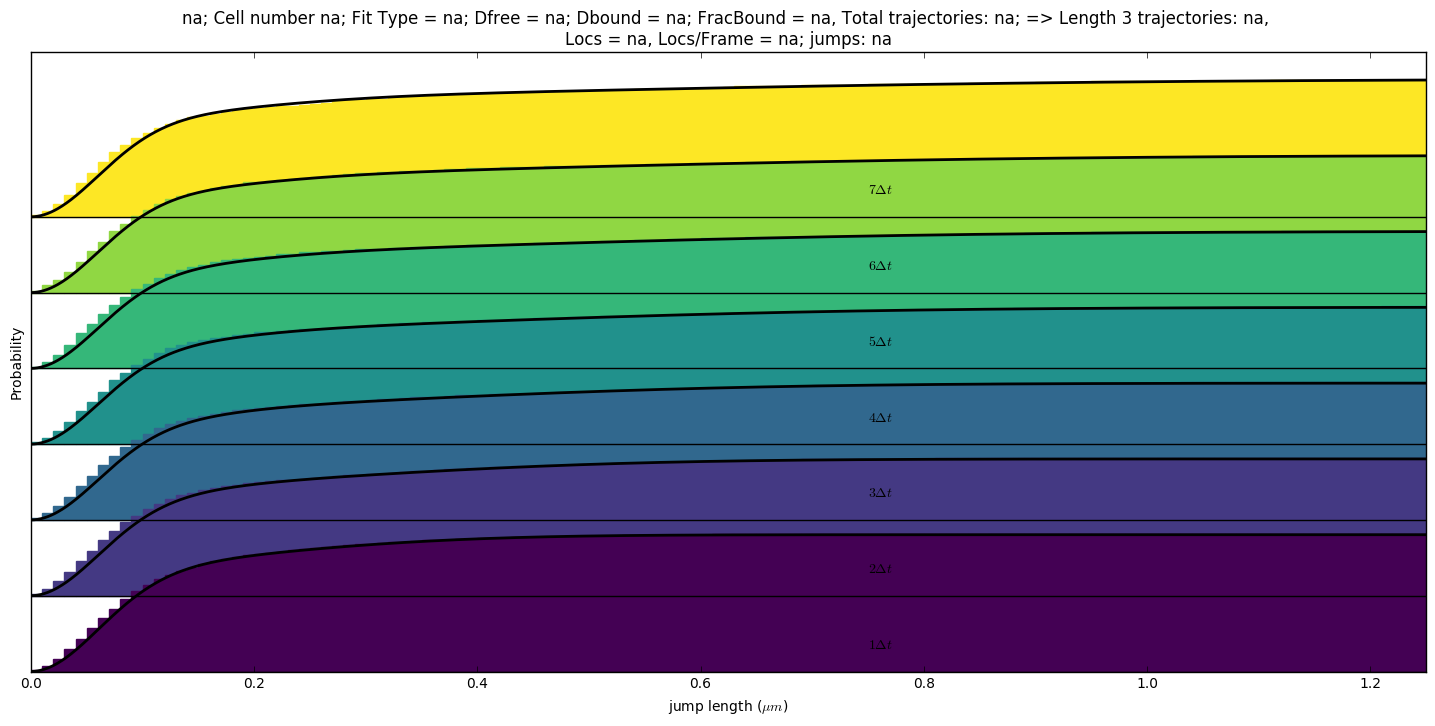

In [16]:
# Plot the CDF
plt.figure(figsize=(18,8)) # Initialize the plot
#plt.plot(JumpProbCDF[0,:])
fastSPT_plot.plot_histogram(HistVecJumps, np.cumsum(JumpProb, axis=1)/10., HistVecJumpsCDF, np.cumsum(scaled_y, axis=1)/100.) ## Read the documentation of this function to learn how to populate all the 'na' fields